Autores:
- Hernán Francisco Díaz Farías
- María Angélica Parra Mendoza
- Loreto Constanza Zavala Gaete

# Tarea 1
### Realice una exploración de datos para ver que datos existen, cuales de ellos entregan información relevante para el problema y cuales no, eliminación (si corresponde) de datos nulos y duplicados, entre otros.

#### Librerías a utilizar

In [267]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#### Cargar el archivo csv

In [268]:
# Cargar el archivo csv
df = (
    pd.read_csv(
        '../data/apartments_for_rent_classified_100K.csv',
        encoding='ISO-8859-1',
        sep=';',
        low_memory=False # Para evitar warnings de dtype
        )
    )

#### Visualización de los datos

In [269]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [270]:
df.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

Los campos tipo object representan campos que pueden contener registros nulos o errores de escritura. Se revisará el campo **id** para empezar.
Creamos una función para revisar si el campo **id** es numérico o no.

In [271]:
def check_id(id):
    try:
        int(id)
        return True
    except:
        return False

numericos = df['id'].apply(check_id).sum()
no_numericos = df['id'].shape[0] - numericos
print(f'Numericos: {numericos}, No numéricos: {no_numericos}')

Numericos: 99492, No numéricos: 0


Se observa que hay 3 registros que no son numéricos. Se revisarán estos registros.

In [272]:
df[~df['id'].apply(check_id)]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time


Se procederá a eliminar estos registros.

In [273]:
df = df[df['id'].apply(check_id)]

Se revisan registros duplicados.

In [274]:
df[df.duplicated()]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
41958,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2.0,2.0,USD,No,Yes,...,"$1,335",Monthly,1084,NaN,Las Vegas,NV,36.1536,-115.1965,RentDigs.com,1568754086
41959,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1.0,1.0,USD,No,Yes,...,"$1,331",Monthly,738,NaN,Northglenn,CO,39.8999,-104.9442,RentDigs.com,1568754072
41960,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3.0,USD,No,Yes,...,"$1,320",Monthly,943,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754069
41961,5508806299,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1.0,2.0,USD,No,Yes,...,"$1,349",Monthly,931,NaN,District Heights,MD,38.8516,-76.8871,RentDigs.com,1568754061
41962,5508806233,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1.0,1.0,USD,No,Yes,...,"$1,260",Monthly,680,NaN,Denver,CO,39.8999,-104.9442,RentDigs.com,1568754056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83243,5197839500,housing/rent/apartment,"Apartment, Studio, 400 sq. ft. - in a great area.",Apartment for rent in Ruckersville. Dogs Dogs ...,NaN,1.0,0.0,USD,No,No,...,$725,Monthly,400,NaN,Ruckersville,VA,38.2203,-78.3844,RentDigs.com,1550823878
83244,5197836604,housing/rent/apartment,offers the lifestyle you deserve in the center...,"Our pet friendly one, 2 and 3 beds apartment h...",NaN,2.0,2.0,USD,No,Yes,...,"$1,237",Monthly,1051,NaN,Charlotte,NC,35.3201,-80.7409,RentDigs.com,1550823780
83245,5197834189,housing/rent/apartment,"Attractive Two BR, Two BA. Pet OK!","Square footage: 1055 square feet, unit number:...","Gym,Parking,Pool",2.0,2.0,USD,No,Yes,...,"$1,476",Monthly,1055,NaN,Tempe,AZ,33.3924,-111.9265,RentDigs.com,1550823679
83246,5197828852,housing/rent/apartment,The Best of the Best in the City of Tempe! Sav...,In the heart of vibrant Tempe near Arizona Sta...,"Gym,Parking,Pool",2.0,3.0,USD,No,Yes,...,"$1,877",Monthly,1261,NaN,Tempe,AZ,33.3924,-111.9265,RentDigs.com,1550823091


Se eliminan los registros duplicados.

In [275]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

Se revisa la columna **category**.

In [276]:
df['category'].value_counts()

category
housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

Dado que la mayoría de los registros son de la categoría **Apartments**, se elegirá esta categoría para el análisis.

In [277]:
df = df[df['category'] == 'housing/rent/apartment']

Revisamos la variable **price_type**.

In [278]:
df['price_type'].value_counts()

price_type
Monthly           99343
Weekly                3
Monthly|Weekly        1
Name: count, dtype: int64

Dado que la mayoría de los registros son de tipo **monthly**, se elegirá esta categoría para el análisis.

In [279]:
df = df[df['price_type'] == 'Monthly']

Se analiza la variable **cityname**.

In [280]:
df['cityname'].value_counts()

cityname
Dallas           2856
Denver           2749
Los Angeles      2429
Las Vegas        1846
Arlington        1577
                 ... 
La Grange           1
Columbia City       1
Pomona              1
High Ridge          1
Waunakee            1
Name: count, Length: 2977, dtype: int64

Dado que la variable **cityname** tiene muchos valores, se omitirá para el análisis de clustering, ya que no se puede considerar como una variable categórica.

In [281]:
df = df.drop(columns=['cityname'])

Se revisa la variable **pets_allowed**.

In [282]:
df['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs         37058
Cats               1840
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

Se convierte la variable **pets_allowed_cat** a tipo categórica.

In [283]:
df['pets_allowed_cat'] = df['pets_allowed'].fillna('No').map({'Cats,Dogs': 'Si', 'Cats': 'Si', 'Dogs': 'Si', 'Cats,Dogs,None': 'Si', 'No': 'No'})
df['pets_allowed_cat'].value_counts()

pets_allowed_cat
No    60317
Si    39026
Name: count, dtype: int64

In [284]:
labelencoder = preprocessing.LabelEncoder()
df['pets_allowed_cat'] = labelencoder.fit_transform(df['pets_allowed_cat'])
df['pets_allowed_cat'].value_counts()

pets_allowed_cat
0    60317
1    39026
Name: count, dtype: int64

Se revisa la **latitud** y **longitud**.

In [285]:
df[['latitude', 'longitude']]

,latitude,longitude
0,33.8520,-118.3759
1,37.0867,-76.4941
2,35.8230,-78.6438
3,38.3622,-121.9712
4,35.1038,-106.6110
...,...,...
99487,29.6151,-95.1998
99488,30.2254,-81.7579
99489,32.7379,-117.0914
99490,35.4158,-80.8451


Se revisa **bathrooms** y **bedrooms**.

In [286]:
nulos_bath = df['bathrooms'].isnull().sum()
null_bed = df['bedrooms'].isnull().sum()
print(f'Nulos en bathrooms: {nulos_bath}, nulos en bedrooms: {null_bed}')

Nulos en bathrooms: 61, nulos en bedrooms: 123


Se eliminan los registros nulos.

In [287]:
df = df.dropna(subset=['bathrooms', 'bedrooms'])
df.isnull().sum()

id                      0
category                0
title                   0
body                    0
amenities           15962
bathrooms               0
bedrooms                0
currency                0
fee                     0
has_photo               0
pets_allowed        60176
price                   1
price_display           1
price_type              0
square_feet             0
address             91268
state                 298
latitude               25
longitude              25
source                  0
time                    0
pets_allowed_cat        0
dtype: int64

Los registros de **bathrooms** y **bedrooms** no son continuos, por lo que se considerarán categóricos.

In [288]:
df['bathrooms'] = labelencoder.fit_transform(df['bathrooms'])
df['bedrooms'] = labelencoder.fit_transform(df['bedrooms'])

### 2. De acuerdo con lo anterior, seleccione las variables que utilizará para realizar la segmentación, y con ello determine el modelo a utilizar.
Se seleccionarán las variables **bathrooms**, **bedrooms**, **pets_allowed_cat**, **price**, **square_feet**, **latitude** y **longitude**.
Se utilizará el modelo K-Prototypes, ya que se tienen variables numéricas y categóricas.

In [289]:
df_vals = df.filter(items=['bathrooms','bedrooms', 'pets_allowed_cat', 'price', 'square_feet', 'latitude', 'longitude'], axis=1)

Revisamos si hay valores nulos.

In [290]:
df_vals.isnull().sum()

bathrooms            0
bedrooms             0
pets_allowed_cat     0
price                1
square_feet          0
latitude            25
longitude           25
dtype: int64

Se eliminan los registros nulos ya que la cantidad es baja.

In [291]:
df_vals = df_vals.dropna().reset_index(drop=True)
df_vals.isnull().sum()

bathrooms           0
bedrooms            0
pets_allowed_cat    0
price               0
square_feet         0
latitude            0
longitude           0
dtype: int64

Separamos el dataframe en variables numéricas y categóricas.
**Bathrooms**, **bedrooms**, **pets_allowed_cat** son categóricas, las dos primeras no son continuas, por lo que se consideran categóricas.

In [292]:
df_vals_num = df_vals[['price','square_feet','latitude','longitude']]
df_vals_cat = df_vals[['bathrooms','bedrooms','pets_allowed_cat']]

Se estandardizan las variables numéricas y se unen con las categóricas.

In [293]:
scaler = preprocessing.StandardScaler()
df_vals_num = pd.DataFrame(scaler.fit_transform(df_vals_num), columns=df_vals_num.columns)
df_scaled = df_vals_num.join(df_vals_cat)
df_scaled.head()


,price,square_feet,latitude,longitude,bathrooms,bedrooms,pets_allowed_cat
0,0.742234,-1.133344,-0.672541,-1.696039,0,1,1
1,-0.308033,1.489302,0.030499,0.952877,1,3,1
2,-0.146881,1.899946,-0.244157,0.816914,2,3,0
3,0.080955,-0.372284,0.307720,-1.923433,0,2,1
4,-0.613666,-0.908858,-0.400471,-0.951939,0,1,1


### 3. Realice la segmentación con el modelo escogido, seleccionando correctamente el número de clusters.

In [294]:
cost = []
K = range(1,7)
for num_clusters in K:
    print(f'Calculando para {num_clusters} clusters')
    kproto = KPrototypes(n_clusters=num_clusters, n_jobs=-1, random_state=2024)
    kproto.fit(df_scaled, categorical=[4,5,6])
    cost.append(kproto.cost_)


Calculando para 1 clusters
Calculando para 2 clusters
Calculando para 3 clusters
Calculando para 4 clusters
Calculando para 5 clusters
Calculando para 6 clusters


Graficamos el codo.

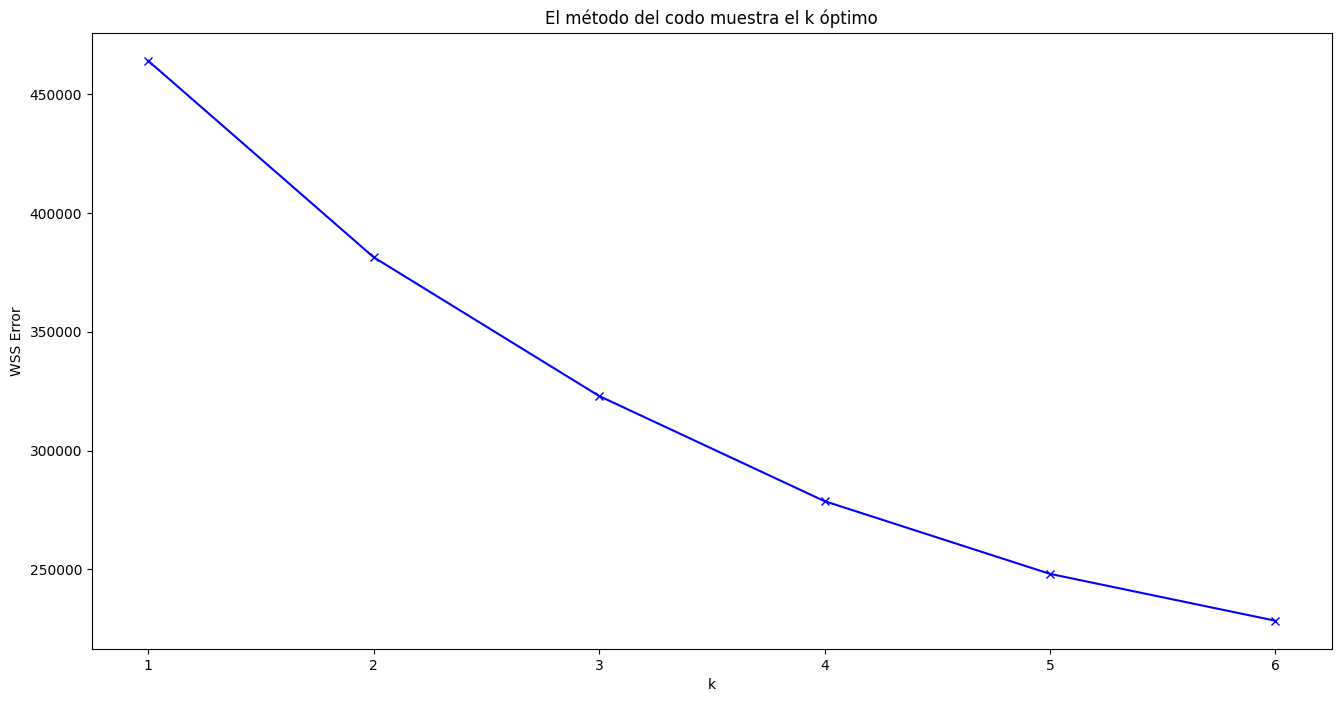

In [296]:
plt.figure(figsize=(16,8))
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS Error')
plt.title('El método del codo muestra el k óptimo')
plt.show()

Metodo silhouette

In [ ]:
from sklearn.metrics import silhouette_score
distortions = [0]
K = range(2,6)
for k in K:
    print(f'Calculando para {k} clusters')
    kproto = KPrototypes(n_clusters=k, n_jobs=-1, random_state=2024)
    kproto.fit_predict(df_scaled, categorical=[4,5,6])
    silhouette_avg = silhouette_score(df_scaled, kproto.labels_)
    distortions.append(silhouette_avg)


Calculando para 2 clusters


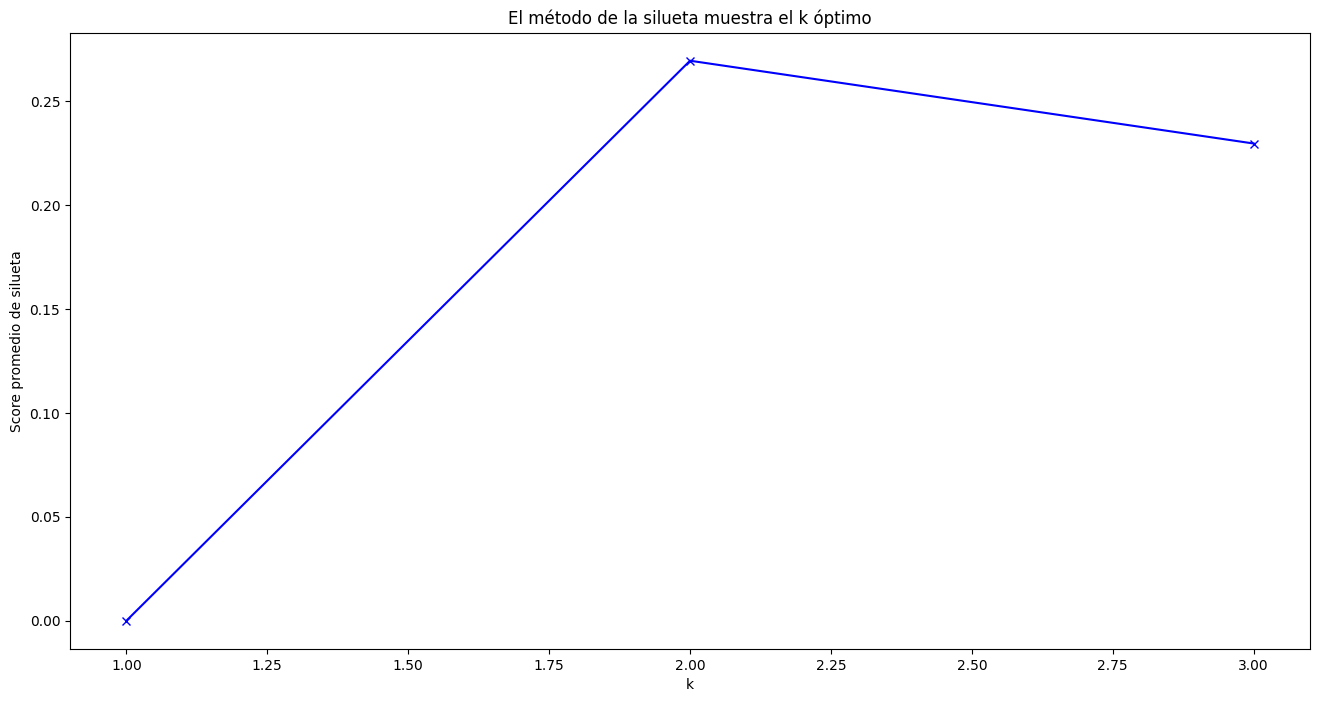

In [266]:
plt.figure(figsize=(16,8))
plt.plot(range(1,4), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Score promedio de silueta')
plt.title('El método de la silueta muestra el k óptimo')
plt.show()

Se observa que el número óptimo de clusters es 2.
Se procederá a realizar el clustering con 2 clusters.

In [240]:
kproto = KPrototypes(n_clusters=2, n_jobs=-1, random_state=2024)
kproto.fit_predict(df_scaled, categorical=[4,5,6])

array([0, 1, 1, ..., 0, 0, 0], dtype=uint16)

In [242]:
df_vals['cluster'] = kproto.labels_
df_vals.head()

,bathrooms,bedrooms,pets_allowed_cat,price,square_feet,latitude,longitude,cluster
0,0,1,1,2195.0,542,33.8520,-118.3759,0
1,1,3,1,1250.0,1500,37.0867,-76.4941,1
2,2,3,0,1395.0,1650,35.8230,-78.6438,1
3,0,2,1,1600.0,820,38.3622,-121.9712,0
4,0,1,1,975.0,624,35.1038,-106.6110,0


Se revisan los centroides.

In [244]:
centroides = pd.DataFrame(kproto.cluster_centroids_, columns=df_scaled.columns)
centroides


,price,square_feet,latitude,longitude,bathrooms,bedrooms,pets_allowed_cat
0,-0.299409,-0.562871,0.071977,-0.050689,0.0,1.0,0.0
1,0.416977,0.783892,-0.100240,0.070593,2.0,2.0,0.0


Se desestandarizan los centroides.

In [245]:
centroides_num = centroides[['price','square_feet','latitude','longitude']]
centroides_num = pd.DataFrame(scaler.inverse_transform(centroides_num), columns=centroides_num.columns)
centroides_num

,price,square_feet,latitude,longitude
0,1257.759345,750.382385,37.277541,-92.361404
1,1902.343092,1242.327621,36.485165,-90.443824


Se devuelven los campos categoricos a su valor original.

In [252]:
centroides_cat = centroides[['bathrooms','bedrooms','pets_allowed_cat']]
centroides_cat.loc[:, 'bathrooms'] = labelencoder.inverse_transform(centroides_cat['bathrooms'].astype(int))
centroides_cat.loc[:, 'bedrooms'] = labelencoder.inverse_transform(centroides_cat['bedrooms'].astype(int))
centroides_cat.loc[:, 'pets_allowed_cat'] = labelencoder.inverse_transform(centroides_cat['pets_allowed_cat'].astype(int))
centroides_cat

,bathrooms,bedrooms,pets_allowed_cat
0,0.0,1.0,0.0
1,2.0,2.0,0.0


Unimos los centroides.

In [254]:
centroides = centroides_num.join(centroides_cat)
centroides

,price,square_feet,latitude,longitude,bathrooms,bedrooms,pets_allowed_cat
0,1257.759345,750.382385,37.277541,-92.361404,0.0,1.0,0.0
1,1902.343092,1242.327621,36.485165,-90.443824,2.0,2.0,0.0


Se revisan los clusters.

In [255]:
df_vals.groupby('cluster').size()

cluster
0    57701
1    41432
dtype: int64

Se grafican los clusters.
La gráfica muestra la distribución de los clusters en el plano **latitude** y **longitude**.

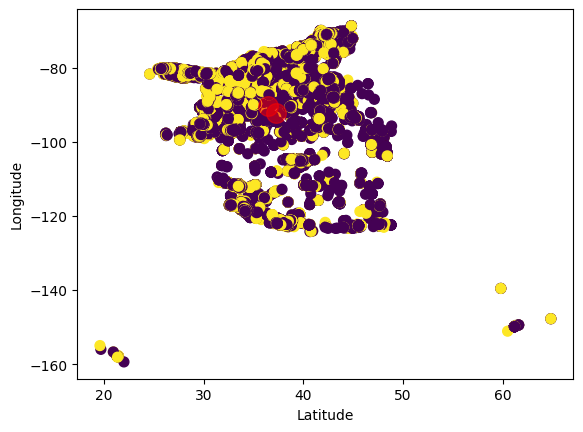

In [257]:
plt.scatter(df_vals['latitude'], df_vals['longitude'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['latitude'], centroides['longitude'], c='red', s=200, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Se grafica la distribución de los clusters en el plano **price** y **square_feet**.

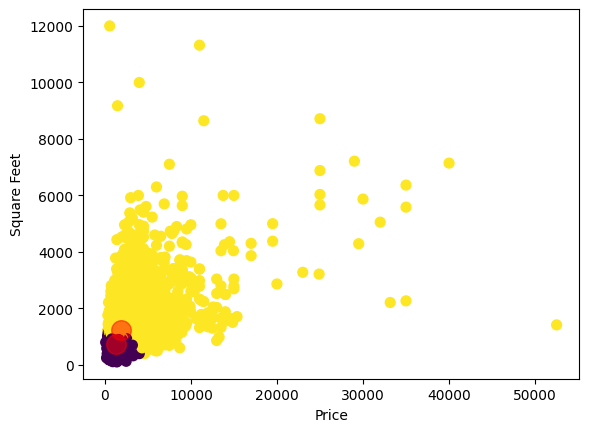

In [258]:
plt.scatter(df_vals['price'], df_vals['square_feet'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['price'], centroides['square_feet'], c='red', s=200, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Square Feet')
plt.show()


Se grafica la distribución de los clusters en el plano **bedrooms** y **bathrooms**.

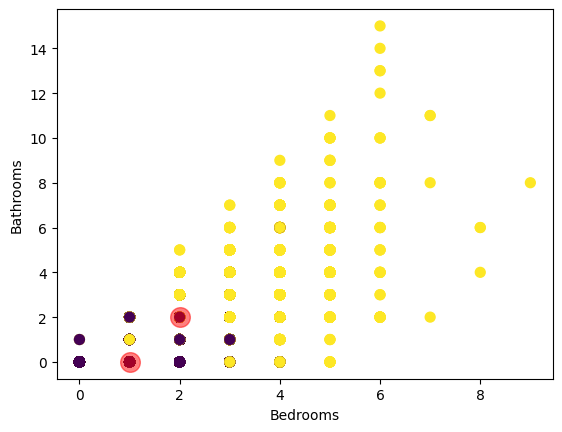

In [260]:
plt.scatter(df_vals['bedrooms'], df_vals['bathrooms'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['bedrooms'], centroides['bathrooms'], c='red', s=200, alpha=0.5)
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

Se grafica la distribución de los clusters en el plano **price** y **bedrooms**.

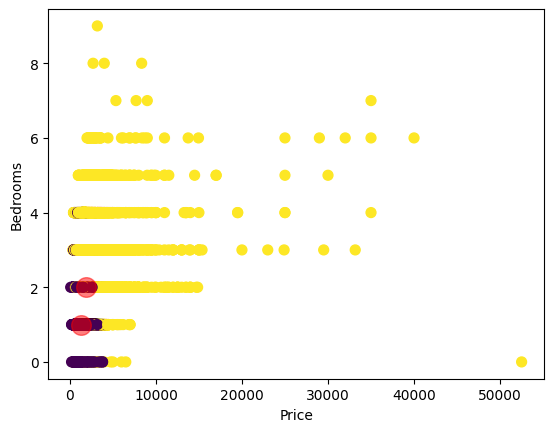

In [261]:
plt.scatter(df_vals['price'], df_vals['bedrooms'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['price'], centroides['bedrooms'], c='red', s=200, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show()


Se grafica la distribución de los clusters en el plano **price** y **bathrooms**.

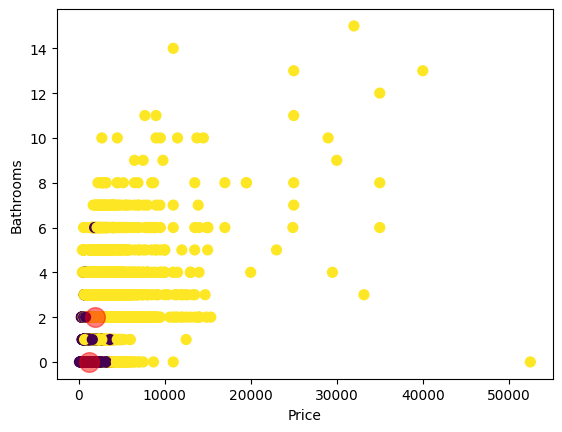

In [262]:
plt.scatter(df_vals['price'], df_vals['bathrooms'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['price'], centroides['bathrooms'], c='red', s=200, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show()

Se grafica la distribución de los clusters en el plano **square_feet** y **bedrooms**.

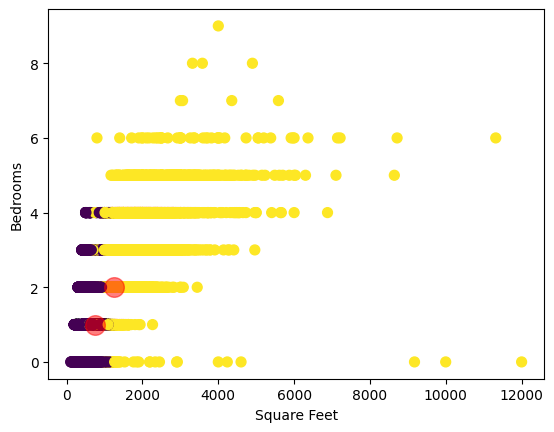

In [263]:
plt.scatter(df_vals['square_feet'], df_vals['bedrooms'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['square_feet'], centroides['bedrooms'], c='red', s=200, alpha=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Bedrooms')
plt.show()

Se grafica la distribución de los clusters en el plano **square_feet** y **bathrooms**.

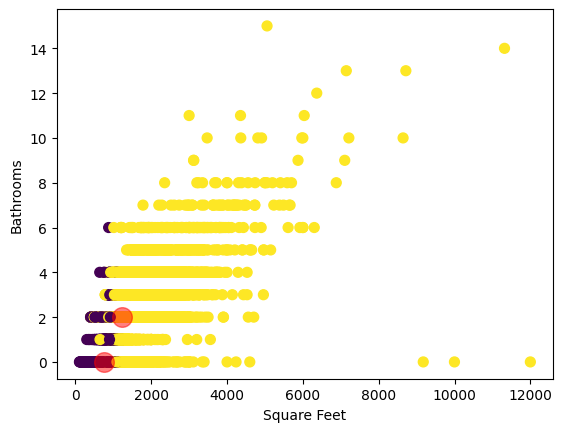

In [264]:
plt.scatter(df_vals['square_feet'], df_vals['bathrooms'], c=df_vals['cluster'], s=50, cmap='viridis')
plt.scatter(centroides['square_feet'], centroides['bathrooms'], c='red', s=200, alpha=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Bathrooms')
plt.show()


Interpretación de los resultados obtenidos.

En base a los centroides obtenidos, se puede inferir que:
-  El cluster 0 (57701 resgistros) corresponde a propiedades menor tamaño(promedio de 750.38 pies cuadrados) y precio (1257.75 dolares promedio), con 0 baños y 1 dormitorio.
-  El cluster 1 (41432 registros) corresponde a propiedades de mayor tamaño(1242.32 pies cuadrados) y precio(1902.34 dólares), con 2 baños y 2 dormitorios.
-  No se observa una relación clara entre la variable **pets_allowed_cat** y los clusters.
-  Tampoco se observa una relación clara entre la variable **latitude** y **longitude** y los clusters.